NAME : PINJARI DANISH 
INTERNSHIP IN OASIS INFOBYTE
DOMAIN : DATA ANALYTICS

Exploratory Data Analysis (EDA) on Retail Sales Data

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [27]:
# Use the exact path you provided
data = pd.read_csv(r'C:\Users\DANISH\Desktop\Projects\retail_sales_analysis_project\retail_sales_dataset.csv')

In [28]:
df = pd.DataFrame(data)

In [29]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [30]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Verify data types
print(df.dtypes)

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
0
Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [31]:
# Total sales
total_sales = df['Total Amount'].sum()
print(f"Total Sales: ${total_sales:,.2f}")

# Average transaction value
avg_transaction = df['Total Amount'].mean()
print(f"Average Transaction Value: ${avg_transaction:,.2f}")

# Sales by product category
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(category_sales)

Total Sales: $456,000.00
Average Transaction Value: $456.00
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


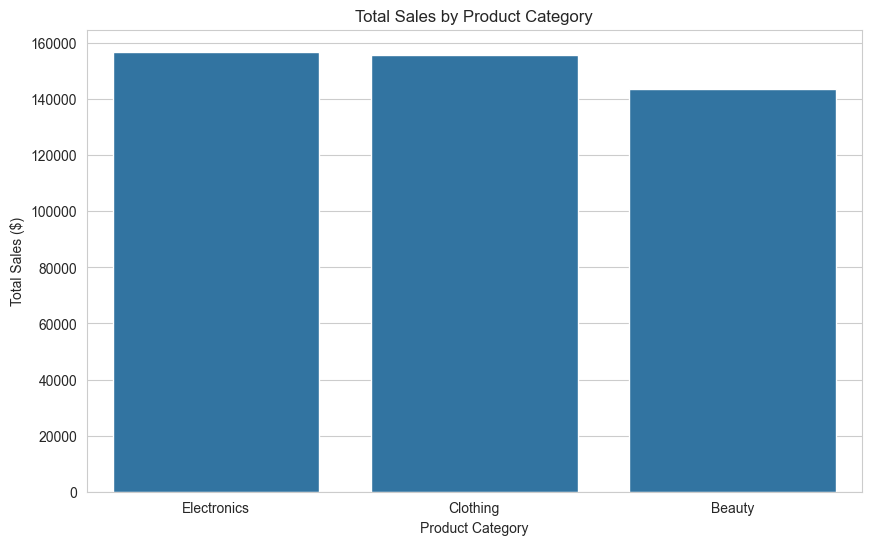

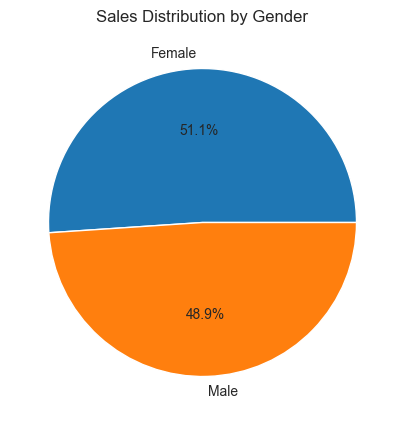

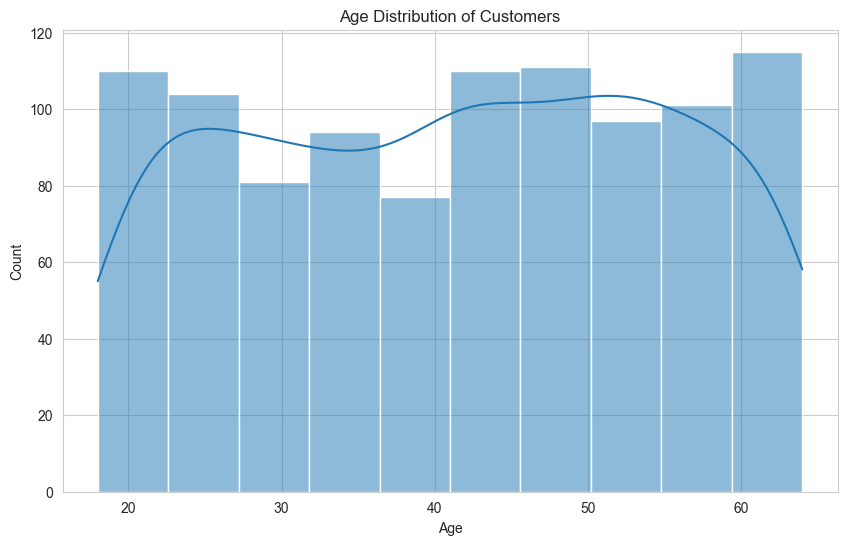

In [32]:
# Set style
sns.set_style('whitegrid')

# Sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales ($)')
plt.xlabel('Product Category')
plt.show()

# Sales by gender
gender_sales = df.groupby('Gender')['Total Amount'].sum()
plt.figure(figsize=(8, 5))
gender_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Gender')
plt.ylabel('')
plt.show()

# Age distribution of customers
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

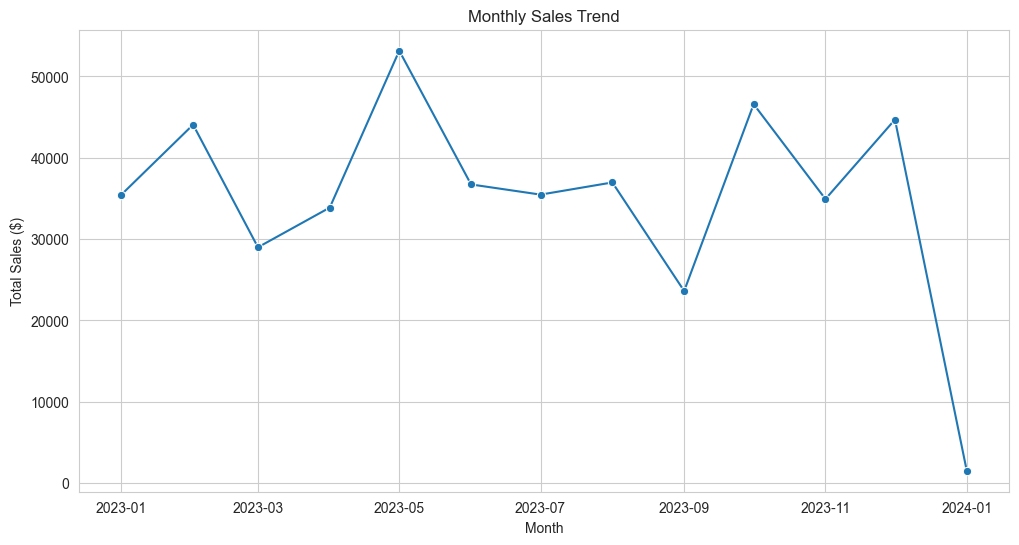

In [33]:
# Extract month and year from date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Monthly sales
monthly_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total Amount', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

Top 5 Customers by Spending:
             Total Amount  Age  Gender
Customer ID                           
CUST487              2000   44    Male
CUST476              2000   27  Female
CUST773              2000   25    Male
CUST503              2000   45    Male
CUST093              2000   35  Female


C:\Users\DANISH\AppData\Local\Temp\ipykernel_11684\1059988374.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = df.groupby('Age Group')['Total Amount'].mean()


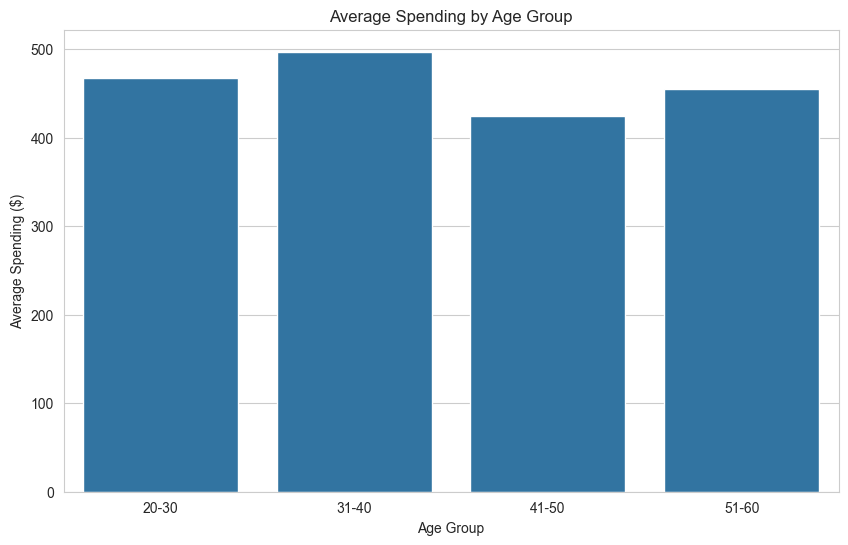

In [34]:
# Customer segmentation by spending
customer_spending = df.groupby('Customer ID').agg({
    'Total Amount': 'sum',
    'Age': 'first',
    'Gender': 'first'
}).sort_values('Total Amount', ascending=False)

# Top customers
print("Top 5 Customers by Spending:")
print(customer_spending.head())

# Average spending by age group
df['Age Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '31-40', '41-50', '51-60'])
age_group_spending = df.groupby('Age Group')['Total Amount'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_spending.index, y=age_group_spending.values)
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending ($)')
plt.show()

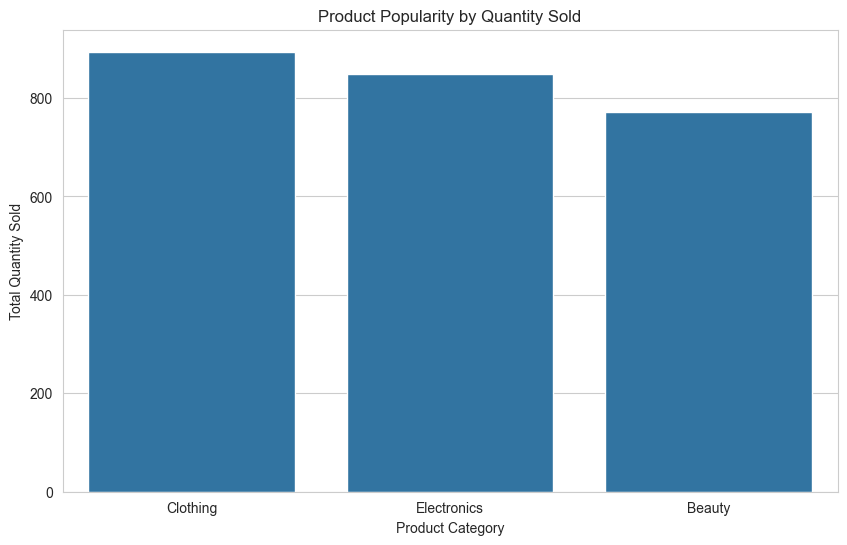

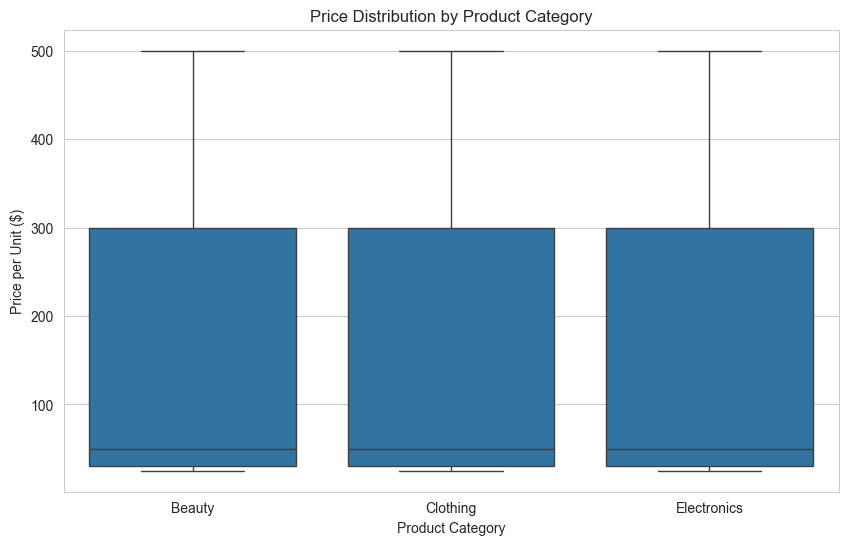

In [35]:
# Product popularity by quantity sold
product_popularity = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=product_popularity.index, y=product_popularity.values)
plt.title('Product Popularity by Quantity Sold')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.show()

# Price analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product Category', y='Price per Unit', data=df)
plt.title('Price Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price per Unit ($)')
plt.show()

           Recency  Frequency     Monetary
count  1000.000000     1000.0  1000.000000
mean    182.982000        1.0   456.000000
std     105.276773        0.0   559.997632
min       1.000000        1.0    25.000000
25%      90.000000        1.0    60.000000
50%     186.500000        1.0   135.000000
75%     269.000000        1.0   900.000000
max     366.000000        1.0  2000.000000


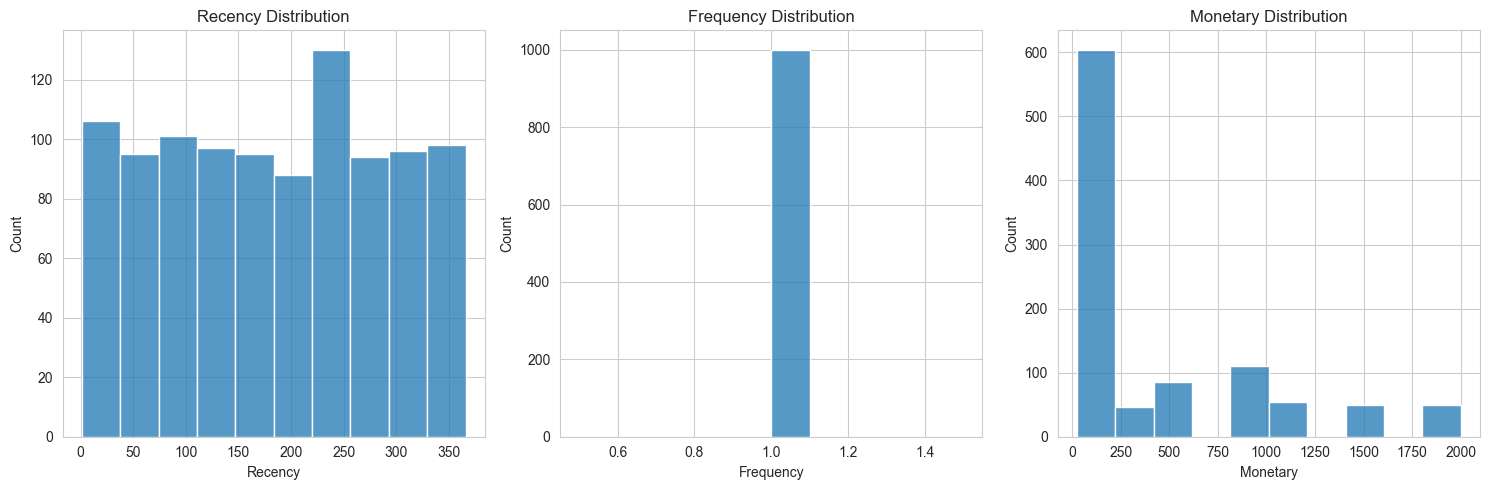

In [36]:
from datetime import datetime

# Set reference date (assuming today is the day after the last transaction)
ref_date = df['Date'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm = df.groupby('Customer ID').agg({
    'Date': lambda x: (ref_date - x.max()).days,  # Recency
    'Transaction ID': 'count',                   # Frequency
    'Total Amount': 'sum'                        # Monetary
}).rename(columns={
    'Date': 'Recency',
    'Transaction ID': 'Frequency',
    'Total Amount': 'Monetary'
})

print(rfm.describe())

# Visualize RFM distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(rfm['Recency'], bins=10, ax=axes[0])
axes[0].set_title('Recency Distribution')
sns.histplot(rfm['Frequency'], bins=10, ax=axes[1])
axes[1].set_title('Frequency Distribution')
sns.histplot(rfm['Monetary'], bins=10, ax=axes[2])
axes[2].set_title('Monetary Distribution')
plt.tight_layout()
plt.show()

In [37]:
# Generate summary report
report = {
    "Total Sales": f"${df['Total Amount'].sum():,.2f}",
    "Number of Transactions": len(df),
    "Average Transaction Value": f"${df['Total Amount'].mean():,.2f}",
    "Top Product Category": df.groupby('Product Category')['Total Amount'].sum().idxmax(),
    "Most Frequent Customers": rfm.sort_values('Frequency', ascending=False).head(3).index.tolist(),
    "Highest Spending Customers": rfm.sort_values('Monetary', ascending=False).head(3).index.tolist(),
    "Sales Trend": "Increasing" if monthly_sales['Total Amount'].iloc[-1] > monthly_sales['Total Amount'].iloc[0] else "Decreasing"
}

print("\n=== Sales Analysis Report ===")
for key, value in report.items():
    print(f"{key}: {value}")


=== Sales Analysis Report ===
Total Sales: $456,000.00
Number of Transactions: 1000
Average Transaction Value: $456.00
Top Product Category: Electronics
Most Frequent Customers: ['CUST001', 'CUST671', 'CUST658']
Highest Spending Customers: ['CUST487', 'CUST476', 'CUST773']
Sales Trend: Decreasing
